**Steps to Code**

1. Upload the dataset from Kaggle

2. Read dataset - using matplotlib

3. 





Getting Dataset from Kaggle

Follow this 
https://www.kaggle.com/general/74235

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aashidutt3","key":"552217ce2b82423aedad0bc90e9737ff"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           3571        121  1.0              
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39          11420       1487  0.9375           
paradisejoy/top-hits-spotify-from-20002019                            Top Hits Spotify from 2000-2019                   94KB  2022-04-26 17:30:03           3272         84  1.0              
muratkokludataset/rice-image-dataset         

In [ ]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

 93% 203M/219M [00:01<00:00, 186MB/s]
100% 219M/219M [00:01<00:00, 162MB/s]


In [ ]:
! unzip rice-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [ ]:
dataset = '/content/Rice_Image_Dataset'

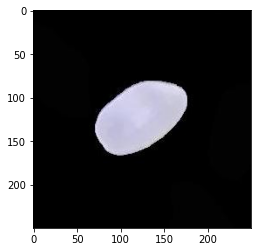

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread('Rice_Image_Dataset/Karacadag/Karacadag (9988).jpg')
plt.imshow(image)

In [ ]:
!pip install imutils
!pip install split-folders # 
import tensorflow as tf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Height = 224
Width = 224
Init_LR = 1e-4
Epochs = 8
BS = 64

In [ ]:
import splitfolders
splitfolders.ratio(dataset, output = "data", seed = 1337, ratio = (0.7, 0.2, 0.1))

Copying files: 75000 files [00:11, 6469.67 files/s]


In [ ]:
train = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale= 1/255,
    validation_split=0.2,
    
)

In [ ]:
from imutils import paths
imagePaths = (list(paths.list_images(dataset)))



In [ ]:
import os
os.makedirs('preview')


In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

img = load_img(imagePaths[50])
x = img_to_array(img)

In [ ]:
x = x.reshape((1,) + x.shape)

In [ ]:
i = 0
for batch in train.flow(x, batch_size=1,save_to_dir='preview', save_prefix='yh', save_format='jpeg'):
    i += 1
    if i > 10:
        break

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
import cv2

(250, 250, 3)

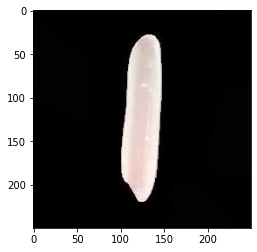

In [ ]:
image = cv2.imread(imagePaths[50])
plt.imshow(image)
image.shape

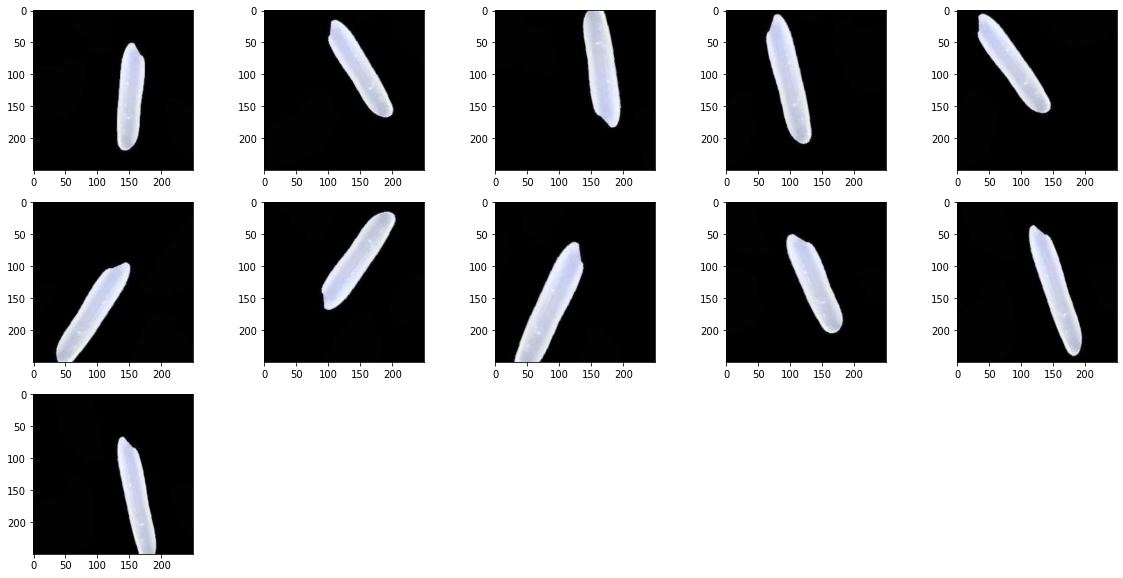

In [ ]:
import glob
import matplotlib.image as mpimg
images = []
for img_path in glob.glob('preview/*.jpeg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)

In [ ]:
trainset = train.flow_from_directory("./data/train",
target_size = (Width,Height),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
class_mode='categorical')

Found 52500 images belonging to 5 classes.


In [ ]:
testset = train.flow_from_directory("./data/test",
target_size = (Width,Height),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
class_mode='categorical')

Found 7500 images belonging to 5 classes.


In [ ]:
valset = train.flow_from_directory("./data/val",
target_size = (Width,Height),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
class_mode='categorical')

Found 15000 images belonging to 5 classes.


In [ ]:
trainset.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.layers import Dropout, Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import AveragePooling2D


In [ ]:
baseModel = tf.keras.applications.MobileNetV2(input_shape=(Width, Height, 3),
                                               include_top=False,
                                               weights='imagenet')


9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:


headModel = baseModel.output

headModel = AveragePooling2D(pool_size = (5,5))(headModel)
headModel = Flatten()(headModel)

headModel =Dense(128, activation ='relu')(headModel)
headModel = Dropout(0.5)(headModel)

headModel = Dense(trainset.num_classes, activation = 'softmax')(headModel)

model = Model(inputs = baseModel.input, outputs = headModel)

for layer in baseModel.layers:
  layer.trainable= False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['Accuracy'])

In [ ]:
H = model.fit_generator(trainset, validation_data = valset, epochs = Epochs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/8
821/821 [==============================] - 757s 907ms/step - loss: 0.4820 - Accuracy: 0.8240 - val_loss: 0.1471 - val_Accuracy: 0.9511
Epoch 2/8
821/821 [==============================] - 727s 885ms/step - loss: 0.2184 - Accuracy: 0.9235 - val_loss: 0.1390 - val_Accuracy: 0.9505
Epoch 3/8
821/821 [==============================] - 722s 879ms/step - loss: 0.1852 - Accuracy: 0.9354 - val_loss: 0.1740 - val_Accuracy: 0.9378
Epoch 4/8
821/821 [==============================] - 718s 874ms/step - loss: 0.1592 - Accuracy: 0.9466 - val_loss: 0.1254 - val_Accuracy: 0.9554
Epoch 5/8
821/821 [==============================] - 720s 877ms/step - loss: 0.1497 - Accuracy: 0.9493 - val_loss: 0.1081 - val_Accuracy: 0.9610
Epoch 6/8
821/821 [==============================] - 764s 930ms/step - loss: 0.1348 - Accuracy: 0.9552 - val_loss: 0.0998 - val_Accuracy: 0.9651
Epoch 7/8
821/821 [==============================] - 722s 879ms/step - loss: 0.1339 - Accuracy: 0.9552 - val_loss: 0.0877 - val_Ac

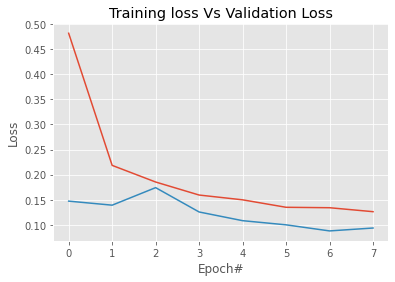

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, Epochs), H.history["loss"], label = 'train-loss')
plt.plot(np.arange(0, Epochs), H.history["val_loss"], label = 'val-loss')
plt.title("Training loss Vs Validation Loss")
plt.xlabel("Epoch#")
plt.ylabel("Loss")
plt.show()


In [ ]:
H.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

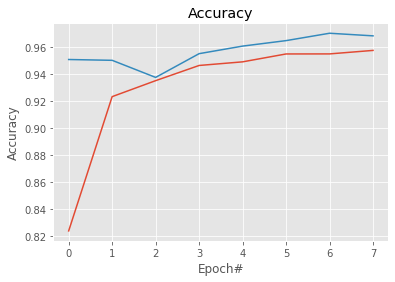

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, Epochs), H.history["Accuracy"], label = 'train-acc')
plt.plot(np.arange(0, Epochs), H.history["val_Accuracy"], label = 'val-acc')
plt.title("Accuracy")
plt.xlabel("Epoch#")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(testset)
print(predictions)



/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


[[9.98419523e-01 1.14217601e-05 2.45839055e-06 1.21364370e-03
  3.52846226e-04]
 [9.77761507e-01 1.77135167e-04 1.01528233e-02 8.13054387e-03
  3.77798267e-03]
 [9.98511970e-01 5.61231843e-07 1.59107549e-06 1.51229951e-05
  1.47080701e-03]
 ...
 [9.66624793e-05 1.06558495e-07 9.15517148e-07 1.71020659e-07
  9.99902129e-01]
 [1.50242529e-03 5.27940529e-07 1.01934645e-04 1.15044361e-06
  9.98393953e-01]
 [8.21119267e-03 6.03705412e-05 2.46096379e-03 3.00763088e-04
  9.88966644e-01]]


In [ ]:
results = predictions.argmax(axis = -1)
print(results)

[0 0 0 ... 4 4 4]


In [ ]:
# Make Model Predictions and Get Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

prediction = model.predict(testset)
results = prediction.argmax(axis = -1)

print(classification_report(testset.classes, results, target_names=testset.class_indices.keys()))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


              precision    recall  f1-score   support

     Arborio       0.96      0.94      0.95      1500
     Basmati       0.95      0.98      0.96      1500
      Ipsala       0.99      0.99      0.99      1500
     Jasmine       0.97      0.93      0.95      1500
   Karacadag       0.96      0.98      0.97      1500

    accuracy                           0.97      7500
   macro avg       0.97      0.97      0.97      7500
weighted avg       0.97      0.97      0.97      7500



In [ ]:
print(confusion_matrix(results, testset.classes))

[[1416    0    6   13   33]
 [   0 1472    0   83    0]
 [   8    0 1491    8    1]
 [  12   28    2 1396    1]
 [  64    0    1    0 1465]]


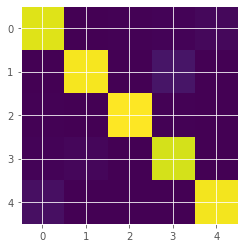

In [ ]:
plt.imshow(confusion_matrix(results, testset.classes))